<a href="https://colab.research.google.com/github/maxwang12/readability-analysis-through-linknestedness/blob/main/2024_Count_Clean_Links.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
chunk1 = pd.read_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/Chunk1PrivacyPolicies_df_all_links_list_raw.csv')
chunk2 = pd.read_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/chunk2PrivacyPolicies_df_all_links_list_raw.csv')
chunk3 = pd.read_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/chunk3PrivacyPolicies_df_all_links_list_raw.csv')
chunk4 = pd.read_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/chunk4PrivacyPolicies_df_all_links_list_raw.csv')
chunk5 = pd.read_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/chunk5PrivacyPolicies_df_all_links_list_raw.csv')
chunk6 = pd.read_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/chunk6PrivacyPolicies_df_all_links_list_raw.csv')
chunk7 = pd.read_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/chunk7PrivacyPolicies_df_all_links_list_raw.csv')
chunk8 = pd.read_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/chunk8PrivacyPolicies_df_all_links_list_raw.csv')
chunk9 = pd.read_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/chunk9PrivacyPolicies_df_all_links_list_raw.csv')



In [4]:
# Concatenate the chunks to combine the chunks into one dataframe
all_chunks = pd.concat([chunk1, chunk2, chunk3, chunk4, chunk5,
                        chunk6, chunk7, chunk8, chunk9])


In [5]:
all_chunks.head()

,id_x,site_id,homepage_snapshot_url,policy_snapshot_url,policy_url,homepage_snapshot_redirected_url,year,phase,policy_text_id,policy_html_id,...,smog,flesch_ease,length,sha1,simhash,id,domain,categories,rank,all_links
0,400323,123165,https://web.archive.org/web/20130411001236id_/...,https://web.archive.org/web/20130519070238id_/...,wapreview.com/blog/?page_id=511,https://web.archive.org/web/20130410205942id_/...,2013,A,141980,317239,...,NaN,difficult,3910.0,6a1c1c2f369feb53c2605701135bdc4735c1b7ec,7403953916929976104,123165,wapreview.com,business;informationtech,200299.0,NaN
1,110691,125220,https://web.archive.org/web/20120402112604id_/...,https://web.archive.org/web/20120508183757id_/...,whirlwindtraffic.com/yourprivacy.php?rid=,https://web.archive.org/web/20120402112604id_/...,2012,A,50557,97511,...,13.867442,difficult,6833.0,95eaef53491960a4004a8994fa5706e0347a077a,9609842778290070923,125220,whirlwindtraffic.com,parked,195481.0,"['index.php?rid=', '/members/?rid=', 'faqs.php..."
2,62095,69149,https://web.archive.org/web/20150315072934id_/...,https://web.archive.org/web/20150408085146id_/...,malleries.com/policies/privacy_and_security.html,https://web.archive.org/web/20150315072934id_/...,2015,A,30429,56861,...,14.602100,difficult,4970.0,2c47e23684853aa00c63532709da5fe085e6102d,13784375577148171703,69149,malleries.com,shopping,115439.0,NaN
3,564596,92212,https://web.archive.org/web/20160401194304id_/...,https://web.archive.org/web/20160609050426id_/...,r2games.com/public/privacy-policy.html,https://web.archive.org/web/20160401194304id_/...,2016,A,191595,449341,...,14.929298,difficult,8449.0,95b1707a2f04bc59af91d9e9a4ada85e58e40911,3852721476571539716,92212,r2games.com,games,15261.0,"['/', '#', '#', 'javascript:;', '#', '#', '#',..."
4,71213,81041,https://web.archive.org/web/20120930205833id_/...,https://web.archive.org/web/20121231094232id_/...,nxp.com/privacy-policy.html,https://web.archive.org/web/20120930205833id_/...,2012,B,34768,64900,...,15.945699,difficult,8582.0,335bb675b32c980c720d91a55ce90ed9e8b47e3c,5839778325972359421,81041,nxp.com,business;informationtech,50279.0,"['/', '/', '/about.html', '/news.html', '/care..."


In [6]:
#  print the number of empty lists in all_links to see how many pages had no links in them

count = 0
for i in all_chunks['all_links']:
  if i == '[]':
    count += 1
print(count)


1034


In [7]:
# count the number on nans in all_links column
all_chunks['all_links'].isna().sum()


23391

In [8]:
#drop rows that have an empty all_links column

all_chunks_nonan = all_chunks.dropna(subset=['all_links'])
all_chunks_nonan.head()


,id_x,site_id,homepage_snapshot_url,policy_snapshot_url,policy_url,homepage_snapshot_redirected_url,year,phase,policy_text_id,policy_html_id,...,smog,flesch_ease,length,sha1,simhash,id,domain,categories,rank,all_links
1,110691,125220,https://web.archive.org/web/20120402112604id_/...,https://web.archive.org/web/20120508183757id_/...,whirlwindtraffic.com/yourprivacy.php?rid=,https://web.archive.org/web/20120402112604id_/...,2012,A,50557,97511,...,13.867442,difficult,6833.0,95eaef53491960a4004a8994fa5706e0347a077a,9609842778290070923,125220,whirlwindtraffic.com,parked,195481.0,"['index.php?rid=', '/members/?rid=', 'faqs.php..."
3,564596,92212,https://web.archive.org/web/20160401194304id_/...,https://web.archive.org/web/20160609050426id_/...,r2games.com/public/privacy-policy.html,https://web.archive.org/web/20160401194304id_/...,2016,A,191595,449341,...,14.929298,difficult,8449.0,95b1707a2f04bc59af91d9e9a4ada85e58e40911,3852721476571539716,92212,r2games.com,games,15261.0,"['/', '#', '#', 'javascript:;', '#', '#', '#',..."
4,71213,81041,https://web.archive.org/web/20120930205833id_/...,https://web.archive.org/web/20121231094232id_/...,nxp.com/privacy-policy.html,https://web.archive.org/web/20120930205833id_/...,2012,B,34768,64900,...,15.945699,difficult,8582.0,335bb675b32c980c720d91a55ce90ed9e8b47e3c,5839778325972359421,81041,nxp.com,business;informationtech,50279.0,"['/', '/', '/about.html', '/news.html', '/care..."
5,622905,77855,https://web.archive.org/web/20130331125217id_/...,https://web.archive.org/web/20130606121055id_/...,nationalrail.co.uk/46389.aspx,https://web.archive.org/web/20130331125217id_/...,2013,A,32388,495720,...,NaN,difficult,1953.0,a2324d2d728bb36381bcc6b169ac03f1fdbd8cff,900164341961069077,77855,nationalrail.co.uk,business;travel,4263.0,"['#skip-content', '#skip-nav', '/times_fares/p..."
6,877517,33858,https://web.archive.org/web/20180224034751id_/...,https://web.archive.org/web/20180219230850id_/...,ebuzzdaily.net/privacy-policy,https://web.archive.org/web/20180224034751id_/...,2018,A,136726,692776,...,NaN,difficult,1857.0,98fdaa4c35858b538c748f3fe0dcfb5534213209,455219035997453964,33858,ebuzzdaily.net,entertainment,NaN,"['http://ebuzzdaily.net/', 'http://ebuzzdaily...."


In [9]:
all_chunks_nonan_test =  all_chunks_nonan.copy()
all_chunks_nonan_test.head()

,id_x,site_id,homepage_snapshot_url,policy_snapshot_url,policy_url,homepage_snapshot_redirected_url,year,phase,policy_text_id,policy_html_id,...,smog,flesch_ease,length,sha1,simhash,id,domain,categories,rank,all_links
1,110691,125220,https://web.archive.org/web/20120402112604id_/...,https://web.archive.org/web/20120508183757id_/...,whirlwindtraffic.com/yourprivacy.php?rid=,https://web.archive.org/web/20120402112604id_/...,2012,A,50557,97511,...,13.867442,difficult,6833.0,95eaef53491960a4004a8994fa5706e0347a077a,9609842778290070923,125220,whirlwindtraffic.com,parked,195481.0,"['index.php?rid=', '/members/?rid=', 'faqs.php..."
3,564596,92212,https://web.archive.org/web/20160401194304id_/...,https://web.archive.org/web/20160609050426id_/...,r2games.com/public/privacy-policy.html,https://web.archive.org/web/20160401194304id_/...,2016,A,191595,449341,...,14.929298,difficult,8449.0,95b1707a2f04bc59af91d9e9a4ada85e58e40911,3852721476571539716,92212,r2games.com,games,15261.0,"['/', '#', '#', 'javascript:;', '#', '#', '#',..."
4,71213,81041,https://web.archive.org/web/20120930205833id_/...,https://web.archive.org/web/20121231094232id_/...,nxp.com/privacy-policy.html,https://web.archive.org/web/20120930205833id_/...,2012,B,34768,64900,...,15.945699,difficult,8582.0,335bb675b32c980c720d91a55ce90ed9e8b47e3c,5839778325972359421,81041,nxp.com,business;informationtech,50279.0,"['/', '/', '/about.html', '/news.html', '/care..."
5,622905,77855,https://web.archive.org/web/20130331125217id_/...,https://web.archive.org/web/20130606121055id_/...,nationalrail.co.uk/46389.aspx,https://web.archive.org/web/20130331125217id_/...,2013,A,32388,495720,...,NaN,difficult,1953.0,a2324d2d728bb36381bcc6b169ac03f1fdbd8cff,900164341961069077,77855,nationalrail.co.uk,business;travel,4263.0,"['#skip-content', '#skip-nav', '/times_fares/p..."
6,877517,33858,https://web.archive.org/web/20180224034751id_/...,https://web.archive.org/web/20180219230850id_/...,ebuzzdaily.net/privacy-policy,https://web.archive.org/web/20180224034751id_/...,2018,A,136726,692776,...,NaN,difficult,1857.0,98fdaa4c35858b538c748f3fe0dcfb5534213209,455219035997453964,33858,ebuzzdaily.net,entertainment,NaN,"['http://ebuzzdaily.net/', 'http://ebuzzdaily...."


In [10]:

def clean_links(links_list):
  cleaned_list = []
  if links_list is not None: # Check if links_list is None
    for link in links_list:
      if link is not None and '#' not in link and 'mailto' not in link: # Check if link is None
        cleaned_list.append(link)
  return cleaned_list

# Apply the cleaning function to the 'all_links' column
all_chunks_nonan_test['all_links'] = all_chunks_nonan_test['all_links'].apply(lambda x: clean_links(eval(x)))
all_chunks_nonan_test['all_links']

1       [index.php?rid=, /members/?rid=, faqs.php?rid=...
3       [/, javascript:;, /, /games/, /forum/, /suppor...
4       [/, /, /about.html, /news.html, /careers.html,...
5       [/times_fares/postcode.html, http://www.facebo...
6       [http://ebuzzdaily.net/, http://ebuzzdaily.net...
                              ...                        
7992    [/, /about, /, /terms, /legal, http://thisismy...
7993    [http://www.zivame.com/zivame-brands.html?dir=...
7994    [http://streamtuner.ag/, /contact, https://www...
7995    [http://www.fandom.com, http://www.fandom.com/...
7999    [javascript:void(0);, /entertainment, /acg, /s...
Name: all_links, Length: 48609, dtype: object

In [11]:
#make a function that deletes all list items that exactly equal '/'  in all_chunks_nonan_test['all_links']

def remove_slash(links_list):
  return [link for link in links_list if link != '/']

# Apply the function to the 'all_links' column
all_chunks_nonan_test['all_links'] = all_chunks_nonan_test['all_links'].apply(remove_slash)
all_chunks_nonan_test['all_links']

1       [index.php?rid=, /members/?rid=, faqs.php?rid=...
3       [javascript:;, /games/, /forum/, /support/, ht...
4       [/about.html, /news.html, /careers.html, http:...
5       [/times_fares/postcode.html, http://www.facebo...
6       [http://ebuzzdaily.net/, http://ebuzzdaily.net...
                              ...                        
7992    [/about, /terms, /legal, http://thisismyjam.co...
7993    [http://www.zivame.com/zivame-brands.html?dir=...
7994    [http://streamtuner.ag/, /contact, https://www...
7995    [http://www.fandom.com, http://www.fandom.com/...
7999    [javascript:void(0);, /entertainment, /acg, /s...
Name: all_links, Length: 48609, dtype: object

In [12]:
# make a function that deletes all list items that are duplicates within the same list in all_chunks_nonan_test['all_links']

def remove_duplicates(links_list):
  return list(set(links_list))

# Apply the function to the 'all_links' column
all_chunks_nonan_test['all_links'] = all_chunks_nonan_test['all_links'].apply(remove_duplicates)
all_chunks_nonan_test['all_links']


1       [http://www.superiortechsupport.com/index.php?...
3       [http://www.r2games.com/user/?ac=order, http:/...
4       [, /design-portal/TEA1733.html, /applications/...
5       [/contact/feedback/48304.aspx, /46383.aspx, /4...
6       [http://ebuzzdaily.net/contact-us/, http://ebu...
                              ...                        
7992    [http://thisismyjam.com, /legal, /help, /about...
7993    [/nightwear.html?dir=desc&order=bestsellers, h...
7994    [http://streamtuner.ag/watch-vikings-season-4-...
7995    [http://www.fandom.com/wiki/index.php/Naruto, ...
7999    [/world, /tag/movies, /tag/tech, /top-20-anime...
Name: all_links, Length: 48609, dtype: object

In [13]:
all_chunks_nonan_test

,id_x,site_id,homepage_snapshot_url,policy_snapshot_url,policy_url,homepage_snapshot_redirected_url,year,phase,policy_text_id,policy_html_id,...,smog,flesch_ease,length,sha1,simhash,id,domain,categories,rank,all_links
1,110691,125220,https://web.archive.org/web/20120402112604id_/...,https://web.archive.org/web/20120508183757id_/...,whirlwindtraffic.com/yourprivacy.php?rid=,https://web.archive.org/web/20120402112604id_/...,2012,A,50557,97511,...,13.867442,difficult,6833.0,95eaef53491960a4004a8994fa5706e0347a077a,9609842778290070923,125220,whirlwindtraffic.com,parked,195481.0,[http://www.superiortechsupport.com/index.php?...
3,564596,92212,https://web.archive.org/web/20160401194304id_/...,https://web.archive.org/web/20160609050426id_/...,r2games.com/public/privacy-policy.html,https://web.archive.org/web/20160401194304id_/...,2016,A,191595,449341,...,14.929298,difficult,8449.0,95b1707a2f04bc59af91d9e9a4ada85e58e40911,3852721476571539716,92212,r2games.com,games,15261.0,"[http://www.r2games.com/user/?ac=order, http:/..."
4,71213,81041,https://web.archive.org/web/20120930205833id_/...,https://web.archive.org/web/20121231094232id_/...,nxp.com/privacy-policy.html,https://web.archive.org/web/20120930205833id_/...,2012,B,34768,64900,...,15.945699,difficult,8582.0,335bb675b32c980c720d91a55ce90ed9e8b47e3c,5839778325972359421,81041,nxp.com,business;informationtech,50279.0,"[, /design-portal/TEA1733.html, /applications/..."
5,622905,77855,https://web.archive.org/web/20130331125217id_/...,https://web.archive.org/web/20130606121055id_/...,nationalrail.co.uk/46389.aspx,https://web.archive.org/web/20130331125217id_/...,2013,A,32388,495720,...,NaN,difficult,1953.0,a2324d2d728bb36381bcc6b169ac03f1fdbd8cff,900164341961069077,77855,nationalrail.co.uk,business;travel,4263.0,"[/contact/feedback/48304.aspx, /46383.aspx, /4..."
6,877517,33858,https://web.archive.org/web/20180224034751id_/...,https://web.archive.org/web/20180219230850id_/...,ebuzzdaily.net/privacy-policy,https://web.archive.org/web/20180224034751id_/...,2018,A,136726,692776,...,NaN,difficult,1857.0,98fdaa4c35858b538c748f3fe0dcfb5534213209,455219035997453964,33858,ebuzzdaily.net,entertainment,NaN,"[http://ebuzzdaily.net/contact-us/, http://ebu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7992,442840,113553,https://web.archive.org/web/20120415130546id_/...,https://web.archive.org/web/20120626065011id_/...,thisismyjam.com/privacy,https://web.archive.org/web/20120415130546id_/...,2012,A,154826,351768,...,13.454273,difficult,4113.0,64841ee9fc72bb69c1beaa50eef0cf856a9654b4,17078386510783123533,113553,thisismyjam.com,entertainment,35835.0,"[http://thisismyjam.com, /legal, /help, /about..."
7993,348520,130246,https://web.archive.org/web/20160401114132id_/...,https://web.archive.org/web/20160627133017id_/...,zivame.com/privacy_policy_m,https://web.archive.org/web/20160401114132id_/...,2016,A,126537,275306,...,16.072390,difficult,11473.0,257e49fc4e3ea75fd1839f5f33318ba3bef416d2,5916216015209026808,130246,zivame.com,shopping,11901.0,"[/nightwear.html?dir=desc&order=bestsellers, h..."
7994,458161,106456,https://web.archive.org/web/20160331105515id_/...,https://web.archive.org/web/20160415234146id_/...,streamtuner.ag/privacy-policy,https://web.archive.org/web/20160331105515id_/...,2016,A,159614,364116,...,NaN,difficult,2956.0,6d1f95452be627d50386dd44f194e3fe02ba6b24,9393139951487500500,106456,streamtuner.ag,parked,39148.0,[http://streamtuner.ag/watch-vikings-season-4-...
7995,857996,38420,https://web.archive.org/web/20120404090345id_/...,https://web.archive.org/web/20120602185856id_/...,fandom.com/privacy_policy,https://web.archive.org/web/20120404090345id_/...,2012,A,41966,678078,...,12.745085,difficult,16198.0,fbced4655417a82870b2b3fa645be6df0bc942db,8726663140527503306,38420,fandom.com,entertainment,54773.0,"[http://www.fandom.com/wiki/index.php/Naruto, ..."


In [14]:
#create a columns called all_chunks_nonan['num_links'] that return the number of list items in each row of all_chunks_nonan_test['all_links']

all_chunks_nonan_test['num_links'] = all_chunks_nonan_test['all_links'].apply(lambda x: len(x) if isinstance(x, list) else 0)
all_chunks_nonan_test[['num_links', 'all_links']]


,num_links,all_links
1,9,[http://www.superiortechsupport.com/index.php?...
3,29,"[http://www.r2games.com/user/?ac=order, http:/..."
4,85,"[, /design-portal/TEA1733.html, /applications/..."
5,53,"[/contact/feedback/48304.aspx, /46383.aspx, /4..."
6,10,"[http://ebuzzdaily.net/contact-us/, http://ebu..."
...,...,...
7992,15,"[http://thisismyjam.com, /legal, /help, /about..."
7993,174,"[/nightwear.html?dir=desc&order=bestsellers, h..."
7994,120,[http://streamtuner.ag/watch-vikings-season-4-...
7995,89,"[http://www.fandom.com/wiki/index.php/Naruto, ..."


In [15]:
all_chunks_nonan_test.to_csv('/content/drive/MyDrive/RESEARCH/PROJECTS/2024_Link_nestedness/PrivacyPolicies_df_all_nona_linkcount.csv')

#plot

In [16]:
#create a dataframe that gives the average all_chunks_nonan_test['num_links'] by sampled_df['year'] and keep year as a column

link_count_by_year = all_chunks_nonan_test.groupby('year')['num_links'].mean()
link_count_by_year_df = pd.DataFrame(link_count_by_year)
link_count_by_year_df


,num_links
year,
2009,41.118822
2010,49.731027
2011,51.629649
2012,53.326481
2013,53.138911
2014,58.255035
2015,55.336001
2016,56.534122
2017,56.272383


In [17]:
# make year a column and reindex the dataframe link_count_by_year_df

link_count_by_year_df = link_count_by_year_df.reset_index()
link_count_by_year_df


,year,num_links
0,2009,41.118822
1,2010,49.731027
2,2011,51.629649
3,2012,53.326481
4,2013,53.138911
5,2014,58.255035
6,2015,55.336001
7,2016,56.534122
8,2017,56.272383
9,2018,57.411044


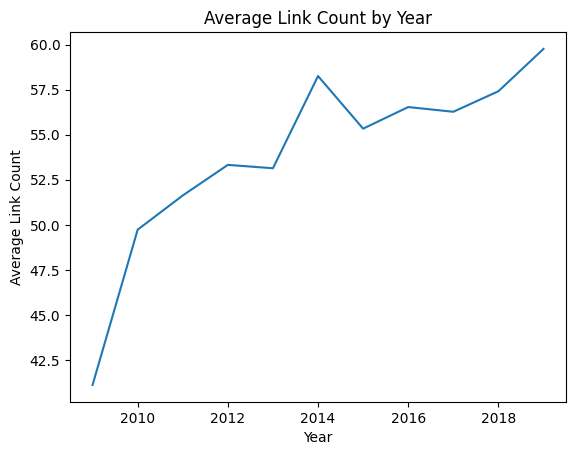

In [19]:
#plot link_count_by_year_df by like_count and year


plt.plot(link_count_by_year_df['year'], link_count_by_year_df['num_links'])
plt.xlabel('Year')
plt.ylabel('Average Link Count')
plt.title('Average Link Count by Year')
plt.show()
